In [18]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
%matplotlib inline

In [19]:
def read_input_file(filepath):
    frame = pd.read_csv(filepath)
    frame['Date'] = pd.to_datetime(frame['Date'], format='%d-%m-%Y')
    frame = frame.sort_values('Date', ascending=True).reset_index(drop=True)
    return frame

In [20]:
reservoir_levels = read_input_file('chennai_reservoir_levels.csv')
rainfall = read_input_file('chennai_reservoir_rainfall.csv')

In [21]:
reservoir_levels.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,3.9,0.0,268.0,0.0
1,2004-01-02,3.9,0.0,268.0,0.0
2,2004-01-03,3.9,0.0,267.0,0.0
3,2004-01-04,3.9,0.0,267.0,0.0
4,2004-01-05,3.8,0.0,267.0,0.0


In [22]:
rainfall.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,0.0,0.0,0.0,0.0
1,2004-01-02,0.0,0.0,0.0,0.0
2,2004-01-03,0.0,0.0,0.0,0.0
3,2004-01-04,0.0,0.0,0.0,0.0
4,2004-01-05,0.0,0.0,0.0,0.0


Excellent, it looks like our data has been read in no problem.  We see above that there are ascending dates starting from January 1st, 2004 for both dataframes on the far left, and that the subseqent columns document the reservoir levels and rainfall levels per-day for each of the main reservoirs in Chennai.

I happen to know that there's no missing data in this dataset (although whether or not the data is accurate remains to be seen).  We can verify that there's no missing data by checking to see how many of the reservoir columns are null with the isnull() method.  This method returns a boolean frame (a frame replacing each response with True or False values) documenting where the condition we're checking for (data is null) is True.  In Python, True is an alias for the value 1 and False is an alias for 0.  Therefore, if we sum across all columns in this boolean frame, we'll get a count of all the responses that are null.  If we do this below, we'll see the sums for both frames is 0, indicating that there are no null values.

In [23]:
print(reservoir_levels.isnull().sum(), '\n\n', rainfall.isnull().sum())

Date               0
POONDI             0
CHOLAVARAM         0
REDHILLS           0
CHEMBARAMBAKKAM    0
dtype: int64 

 Date               0
POONDI             0
CHOLAVARAM         0
REDHILLS           0
CHEMBARAMBAKKAM    0
dtype: int64


In [24]:
start_date, end_date = reservoir_levels['Date'].min(), reservoir_levels['Date'].max()
print('Dataset Start Date:', start_date.strftime('%d-%b-%y'))
print('Dataset End Date:', end_date.strftime('%d-%b-%y'))

Dataset Start Date: 01-Jan-04
Dataset End Date: 17-Jun-19


In [25]:
reservoir_levels.describe()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
count,5647.000000,5647.000000,5647.000000,5647.000000
mean,1133.272203,240.020572,1568.345573,1321.381645
std,1026.009311,274.601731,890.363617,957.057834
min,0.900000,0.000000,0.000000,0.000000
25%,213.000000,22.300000,849.000000,471.500000
50%,782.000000,92.000000,1630.000000,1225.000000
75%,2006.000000,460.000000,2236.000000,2083.000000
max,3231.000000,896.000000,3300.000000,3396.000000


In [26]:
rainfall.describe()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
count,5647.000000,5647.000000,5647.000000,5647.000000
mean,3.364486,3.617177,3.756862,3.923862
std,12.755029,14.078840,15.060551,16.287227
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,300.000000,293.000000,320.000000,475.000000




## Visualization!!


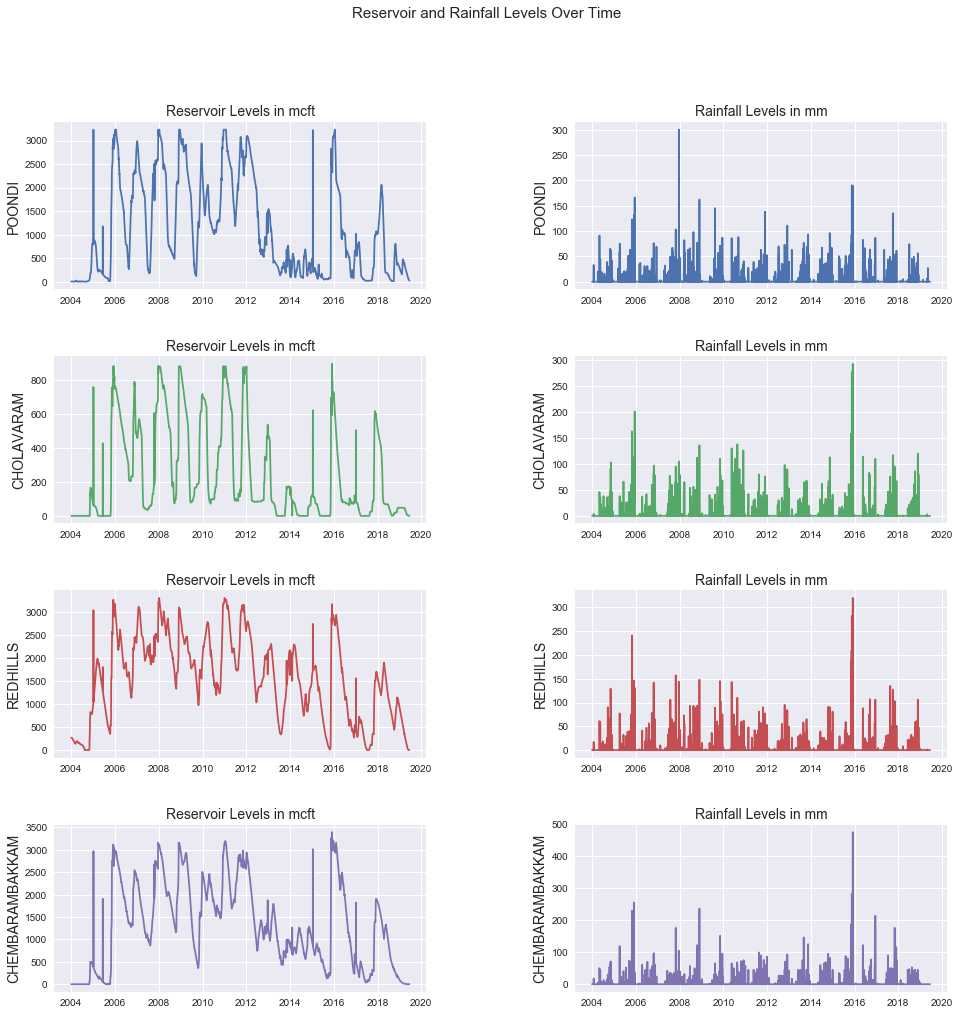

In [27]:
def plot_rainfall_and_reservoir_levels(reservoir_levels, rainfall, type='line', alpha=1):
    fig, ax = plt.subplots(4, 2, figsize=(16, 16))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for index, column in enumerate(reservoir_levels.columns[1:]):
        c = colors[index]
        if type == 'line':
            ax[index][0].plot(reservoir_levels['Date'], reservoir_levels[column], color=c, alpha=alpha)
            ax[index][1].plot(rainfall['Date'], rainfall[column], color=c, alpha=alpha)
        else:
            ax[index][0].bar(reservoir_levels['Date'], reservoir_levels[column], color=c, alpha=alpha)
            ax[index][1].bar(rainfall['Date'], rainfall[column], color=c, alpha=alpha)
        ax[index][0].set_ylabel(column, size=14)
        ax[index][1].set_ylabel(column, size=14)
        ax[index][0].set_title('Reservoir Levels in mcft', size=14)
        ax[index][1].set_title('Rainfall Levels in mm', size=14)
    fig.suptitle('Reservoir and Rainfall Levels Over Time', size=15)

plot_rainfall_and_reservoir_levels(reservoir_levels, rainfall)

In [28]:
#reservoir levels vs rainfall levels

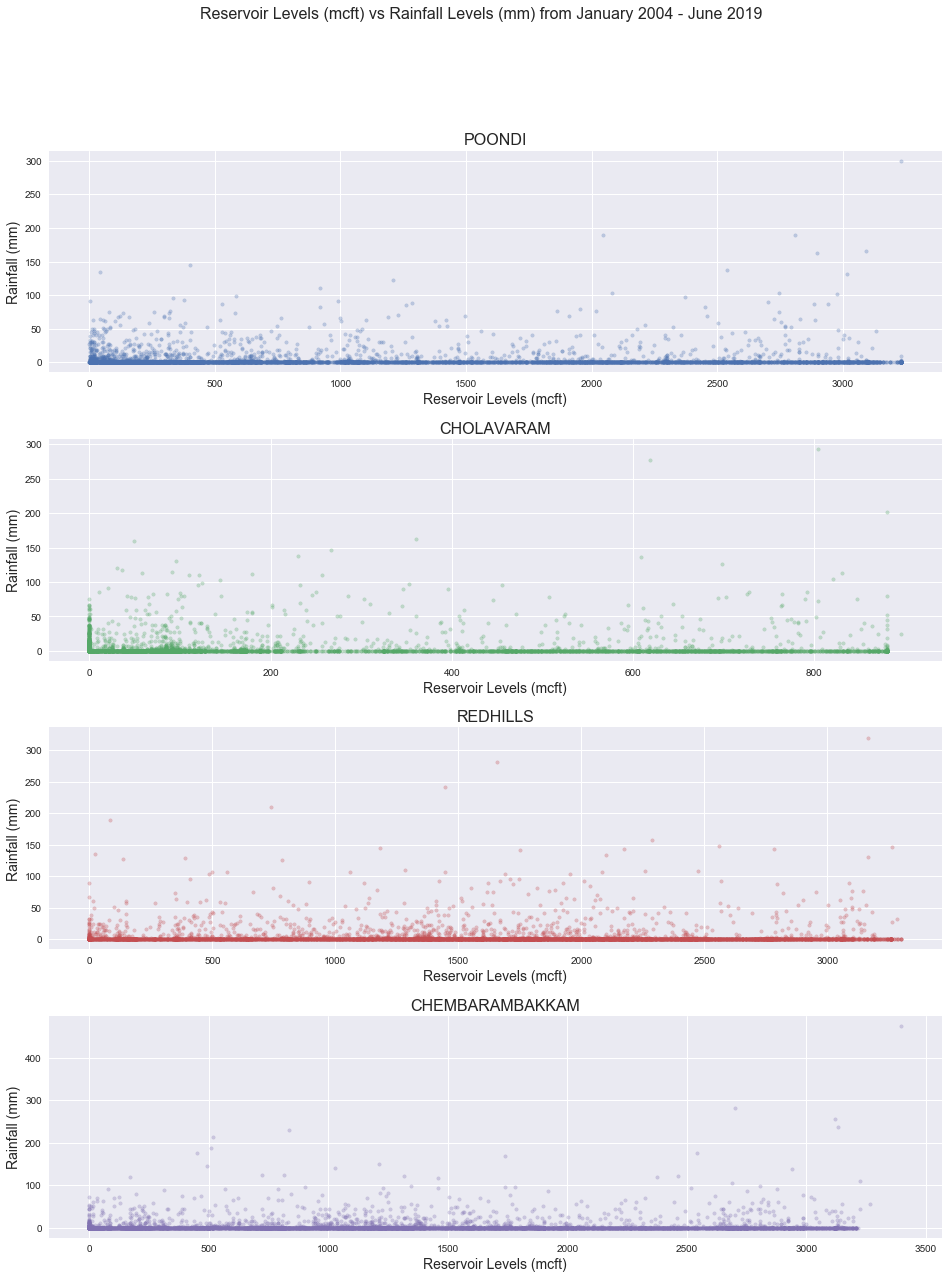

In [29]:

fig, ax = plt.subplots(4, 1, figsize=(16, 20))
for index, column in enumerate(reservoir_levels.columns[1:]):
    ax[index].scatter(reservoir_levels[column], rainfall[column], marker='.', color=colors[index], alpha=0.3)
    ax[index].set_ylabel('Rainfall (mm)', size=14)
    ax[index].set_title(column, size=16)
    ax[index].set_xlabel('Reservoir Levels (mcft)', size=14)
fig.suptitle('Reservoir Levels (mcft) vs Rainfall Levels (mm) from January 2004 - June 2019', size=16)
fig.subplots_adjust(hspace=0.3)

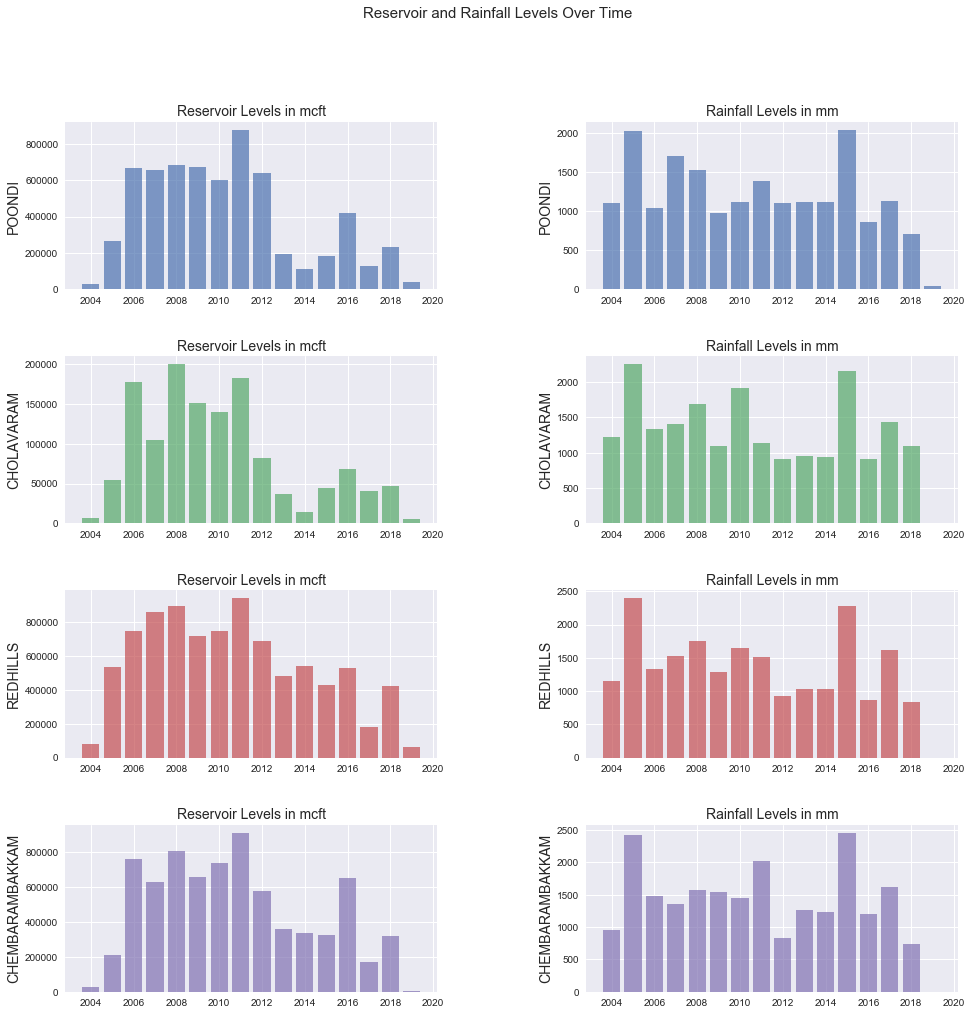

In [30]:
res_year = reservoir_levels.groupby(reservoir_levels.Date.dt.year).sum().reset_index()
rain_year = rainfall.groupby(rainfall.Date.dt.year).sum().reset_index()
plot_rainfall_and_reservoir_levels(res_year, rain_year, 'bar', 0.7)

Text(0.5, 1.0, 'Rainfall Across All 4 Chennai Regions by Year')

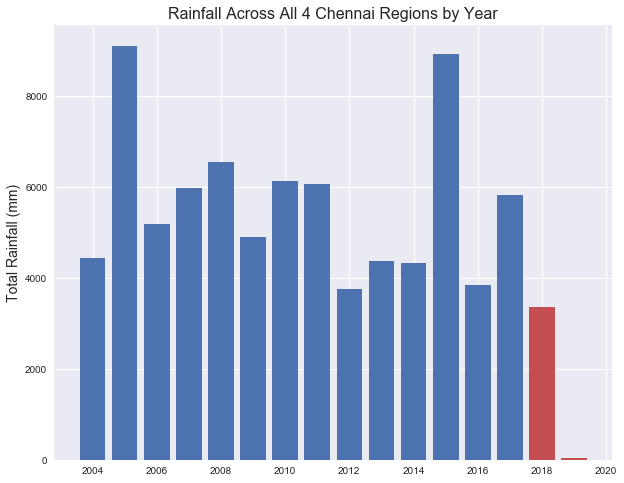

In [31]:
# Aggregate per year
rain_year_aggregate = rain_year.iloc[:, 1:].sum(axis=1)
c = [colors[0] for i in range(rain_year_aggregate.shape[0] - 2)]
c += [colors[2] for i in range(2)]

plt.figure(figsize=(10, 8))
plt.bar(rain_year['Date'], rain_year_aggregate, color=c)
plt.ylabel('Total Rainfall (mm)', size=14)
plt.title('Rainfall Across All 4 Chennai Regions by Year', size=16)

In [37]:
#beginning of February for each year
is_february = reservoir_levels['Date'].dt.month == 2
is_day_one = reservoir_levels['Date'].dt.day == 1
dry_season_res_levels = reservoir_levels.loc[is_february & is_day_one, :].reset_index(drop=True)
dry_season_res_levels

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-02-01,4.8,0.0,220.0,0.0
1,2005-02-01,851.4,56.5,1458.0,275.0
2,2006-02-01,3035.0,721.0,2624.0,2843.0
3,2007-02-01,2565.0,545.0,3106.0,2157.0
4,2008-02-01,3061.0,867.0,3022.0,2960.0
5,2009-02-01,3025.0,778.0,2528.0,2679.0
6,2010-02-01,1493.0,686.0,2342.0,2254.0
7,2011-02-01,3108.0,840.0,3254.0,3080.0
8,2012-02-01,3048.0,495.0,2771.0,2719.0
9,2013-02-01,1359.0,398.0,2212.0,980.0


Text(0.5, 1.0, 'Reservoir Levels at the beginning of Dry Season in Chennai')

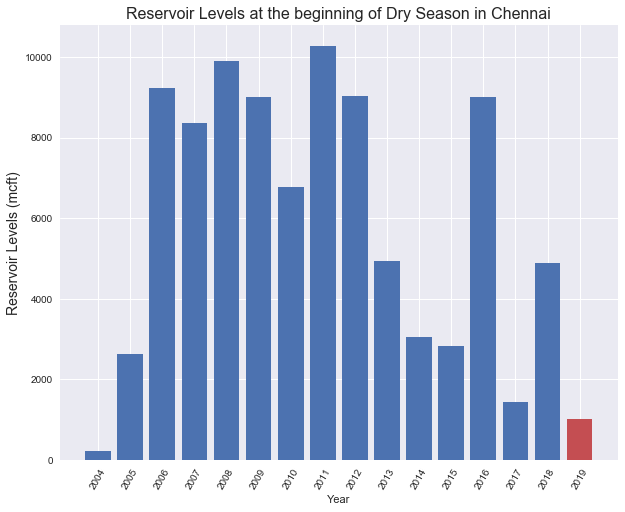

In [38]:
# Sum reservoir levels across all 4 regions per year
dry_season_res_all_regions = dry_season_res_levels.iloc[:, 1:].sum(axis=1)
x_tick_locations = range(dry_season_res_levels.shape[0])
c = [colors[0] for i in range(dry_season_res_levels.shape[0] - 1)]
c.append(colors[2])

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.bar(x_tick_locations, dry_season_res_all_regions, color=c)
ax.set_xticks(x_tick_locations)
ax.set_xticklabels(dry_season_res_levels.Date.dt.strftime('%Y'), rotation=60)
ax.set_ylabel('Reservoir Levels (mcft)', size=14)
ax.set_xlabel('Year')
ax.set_title('Reservoir Levels at the beginning of Dry Season in Chennai', size=16)

In [44]:
#Given a date, determines whether to color for Monsoon, Dry, or Regular season.

Text(0.5, 1.0, 'Reservoir Levels in Chennai per Day')

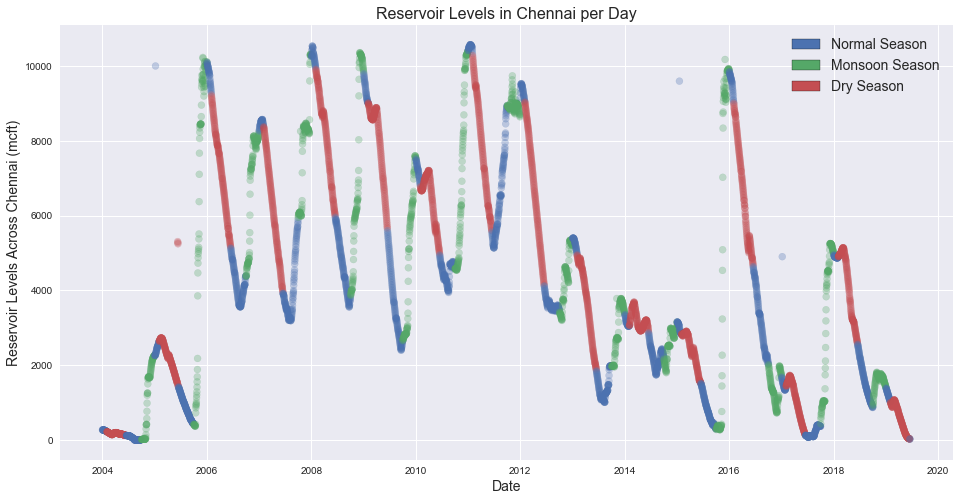

In [45]:
def assign_temporal_categories(date):
    if date.month in [2, 3, 4, 5] or date.month == 6 and date.day <= 15:
        return colors[2]
    elif date.month in [10, 11, 12]:
        return colors[1]
    else:
        return colors[0]

c = reservoir_levels['Date'].apply(assign_temporal_categories, colors)
chennai_reservoirs = reservoir_levels.iloc[:, 1:].sum(axis=1)

plt.figure(figsize=(16, 8))
plt.scatter(reservoir_levels['Date'].values, chennai_reservoirs, color=c, alpha=0.3)

plt.ylabel('Reservoir Levels Across Chennai (mcft)', size=14)
plt.xlabel('Date', size=14)

legend_labels = {'Normal Season':colors[0], 'Monsoon Season':colors[1], 'Dry Season':colors[2]}
leg_el = [mpatches.Patch(facecolor=value, edgecolor='k', label=key) for key, value in legend_labels.items()]

plt.legend(handles=leg_el, prop={'size':14})
plt.title('Reservoir Levels in Chennai per Day', size=16)

In [41]:
#Returns a dataframe with the reservoir level per day and the total accumulated rainfall over the past [days] days.

In [42]:
def get_rolling_rainfall_levels(reservoir_levels, rainfall, days):
    rolling_rainfall = rainfall.iloc[:, 1:].sum(axis=1).rolling(days).sum()
    reservoir_sum_per_day = reservoir_levels.iloc[:, 1:].sum(axis=1)
    merged_frame = pd.concat([reservoir_sum_per_day, rolling_rainfall], axis=1)
    return merged_frame.dropna().reset_index(drop=True)

Text(0.45, 0.05, 'Reservoir Levels (mcft)')

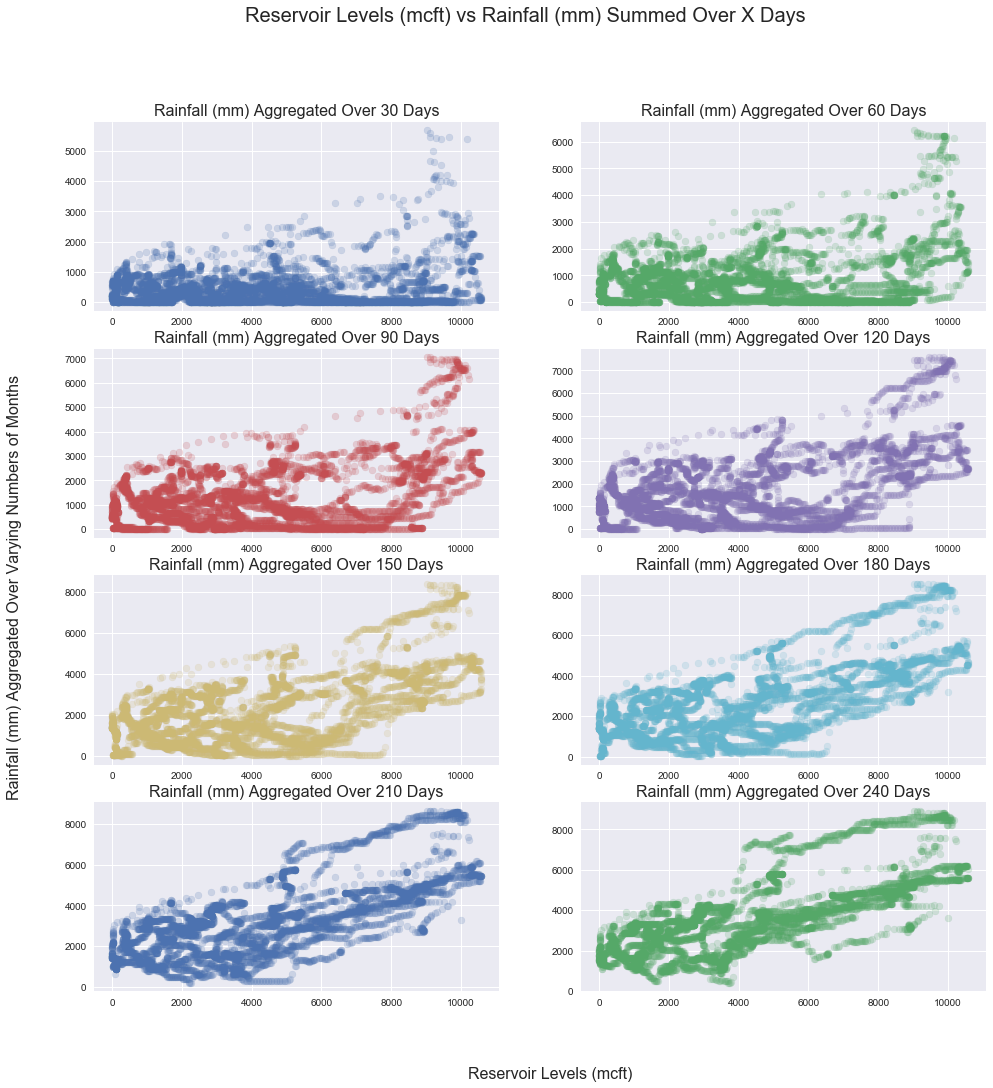

In [43]:
# aggregated rainfall from 1 month to 8 months
n_days = 30
n_months = 8
months = [i for i in range(30, (n_months + 1) * 30, 30)]
data = [get_rolling_rainfall_levels(reservoir_levels, rainfall, month) for month in months]

nrows = math.ceil(len(months) / 2)
fig, ax = plt.subplots(nrows, 2, figsize=(16, 16))
for index, frame in enumerate(data):
    x_index = math.floor(index / 2)
    y_index = math.floor(index % 2)
    ax[x_index][y_index].scatter(frame[0], frame[1], alpha=0.2, color=colors[index % len(colors)])
    ax[x_index][y_index].set_title('Rainfall (mm) Aggregated Over %d Days' % months[index], size=16)
    
fig.suptitle('Reservoir Levels (mcft) vs Rainfall (mm) Summed Over X Days', size=20)
fig.text(0.05, 0.65, 'Rainfall (mm) Aggregated Over Varying Numbers of Months', rotation=90, size=16)
fig.text(0.45, 0.05, 'Reservoir Levels (mcft)', size=16)